## **Analyzing WhatsApp Chats with Python**

This comprehensive notebook demonstrates how to analyze WhatsApp conversations using Python.
The step-by-step process includes:

  * Step 1: Detecting {Date} and {Time} tokens
  * Step 2: Identifying the {Author} token
  * Step 3: Extracting and combining tokens
  * Step 4: Parsing the entire file and handling multi-line messages

> To gain further insights, exploratory data analysis (EDA) is performed:

  * Step 5: Conducting EDA to analyze chat data
  * Step 6: Obtaining overall statistics of the WhatsApp chat, such as the total number of messages, excluding media messages, and total number of URLs
  * Step 7: Extracting basic statistics for each author (user)
  * Step 8: Creating a word cloud to visualize the most frequently used words in the chat
  * Step 9: Calculating the total number of messages sent by each user
  * Step 10: Analyzing the distribution of messages sent on different days of the week
  * Step 11: Identifying the most active author in the chat
  * Step 12: Determining the most active day of the week

> In the subsequent steps, time series analysis is conducted on the chat data:

  * Step 13: Identifying periods of high chat activity
  * Step 14: Determining the specific dates when the chat was highly active
  * Step 15: Converting the time format from 12-hour to 24-hour for better analysis
  * Step 16: Determining the most favorable hour of the day for receiving a response from the user.



In [18]:
!pip install emoji
!pip install seaborn

# Import all necessory libraries

In [19]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.ticker import MaxNLocator
from plotly import express as px
import seaborn as sns
from datetime import *
import datetime as dt

# Step 1: Detecting {Date} and {Time} tokens

In [20]:
def startsWithDate(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False


# Step 2: Identifying the {Author} token

In [22]:
def startsWithAuthor(s):
    patterns = [
        '([\w]+):',                        # First Name
        '([\w]+[\s]+[\w]+):',              # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
        '([+]\d{2} \d{3} \d{4} \d{4}):',   # Mobile Number (Pakistan)
        '([+]\d{2} \d{3} \d{3} \d{4}):',   # Mobile Number (US)
        '([+]\d{2} \d{4} \d{7})'           # Mobile Number (Europe)
    ]
    pattern = '^' + '|'.join(patterns)
    result = regex.match(pattern, s)
    if result:
        return True
    return False

# Step 3: Extracting and Combining tokens

In [23]:
def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if startsWithAuthor(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

# Step 4: Parsing the entire file and handling Multi-Line Messages

In [26]:
data = []
conversation = 'Modified_Messaging_Data.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if startsWithDate(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [37]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

In [61]:
df

,Date,Day,Time,Author,Message,Letter,Word,urlcount,Media_Count,24H_Time,Hours
0,2022-09-02,Friday,9:30 am,Ali,Config 1st,10,2,0,0,09:30,09
1,2022-09-02,Friday,9:30 am,Jack,Ya I modifiJack it because the document I foll...,70,13,0,0,09:30,09
2,2022-09-02,Friday,9:30 am,Ali,2nd is test,11,3,0,0,09:30,09
3,2022-09-02,Friday,9:30 am,Ali,Okok,4,1,0,0,09:30,09
4,2022-09-02,Friday,9:30 am,Jack,Great,5,1,0,0,09:30,09
...,...,...,...,...,...,...,...,...,...,...,...
1027,2022-09-20,Tuesday,5:32 pm,Jack,who have finish math lecture ?,30,6,0,0,17:32,17
1028,2022-09-21,Wednesday,2:25 pm,Jack,You deletJack this message,26,4,0,0,14:25,14
1029,2022-09-21,Wednesday,2:26 pm,Jack,<MJackia omittJack>,19,2,0,0,14:26,14
1030,2022-09-21,Wednesday,2:26 pm,Ali,onz onz,7,2,0,0,14:26,14


In [62]:
df.tail(20)


,Date,Day,Time,Author,Message,Letter,Word,urlcount,Media_Count,24H_Time,Hours
1012,2022-09-18,Sunday,7:51 pm,Jack,😂 😂,3,2,0,0,19:51,19
1013,2022-09-18,Sunday,7:51 pm,Ali,She marking maybe,17,3,0,0,19:51,19
1014,2022-09-18,Sunday,7:51 pm,Ali,G3 few only markJack right,26,5,0,0,19:51,19
1015,2022-09-18,Sunday,7:51 pm,Ali,I saw morning like 3 groups only,32,7,0,0,19:51,19
1016,2022-09-20,Tuesday,12:51 pm,Jack,<MJackia omittJack>,19,2,0,0,12:51,12
1017,2022-09-20,Tuesday,12:52 pm,Jack,I see kk I can hidden it,24,7,0,0,12:52,12
1018,2022-09-20,Tuesday,12:53 pm,Ali,Because we have sharJack alot private things h...,77,14,0,0,12:53,12
1019,2022-09-20,Tuesday,12:53 pm,Ali,Np np,5,2,0,0,12:53,12
1020,2022-09-20,Tuesday,12:53 pm,Jack,OK Bro no worry,15,4,0,0,12:53,12
1021,2022-09-20,Tuesday,12:53 pm,Jack,@60183560200 can?,18,3,0,0,12:53,12


In [63]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1032 non-null   datetime64[ns]
 1   Day          1032 non-null   category      
 2   Time         1032 non-null   object        
 3   Author       1032 non-null   object        
 4   Message      1032 non-null   object        
 5   Letter       1032 non-null   int64         
 6   Word         1032 non-null   int64         
 7   urlcount     1032 non-null   int64         
 8   Media_Count  1032 non-null   int64         
 9   24H_Time     1032 non-null   object        
 10  Hours        1032 non-null   object        
dtypes: category(1), datetime64[ns](1), int64(4), object(5)
memory usage: 82.0+ KB


In [64]:
#----- Authors in the chat
df.Author.unique()

array(['Ali', 'Jack'], dtype=object)

In [43]:
#----- Displaying omitted media while exporting
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

0


In [42]:
#------ Displaying total number of messeges in the chat
total_messages = df.shape[0]
print(total_messages)

1032


# ***Exploratory Data Analysis(EDA)***

# Step 5: Conducting EDA to analyze chat data

In [44]:
### ----------- Checking shape of dataset.
df.shape

### ---------- Checking basic information of dataset
df.info()

### ----------  Checking no. of null values in dataset
df.isnull().sum()

### ---------- Checking head part of dataset
df.head(20)

### -------- Checking tail part of dataset
df.tail(20)

### -------- Droping Nan values from dataset
df = df.dropna()
df = df.reset_index(drop=True)
df.shape

### --------- Checking no. of authors of group
df['Author'].nunique()

### --------- Checking authors of group
df['Author'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1032 non-null   datetime64[ns]
 1   Time     1032 non-null   object        
 2   Author   1032 non-null   object        
 3   Message  1032 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 32.4+ KB


array(['Ali', 'Jack'], dtype=object)

In [45]:
###--------  Adding one more column of "Day" for better analysis, here we use datetime library which help us to do this task easily.
import pandas as pd
import numpy as np
import re as regex

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Define the weekdays mapping
weeks = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

# Map weekday names based on 'Date' column
df['Day'] = df['Date'].dt.weekday.map(weeks)

# Rearrange the columns
df = df[['Date', 'Day', 'Time', 'Author', 'Message']]

# Change the datatype of 'Day' column to category
df['Day'] = df['Day'].astype('category')

# Count number of letters in each message
df['Letter'] = df['Message'].apply(lambda s: len(s))

# Count number of words in each message
df['Word'] = df['Message'].apply(lambda s: len(s.split(' ')))

# Function to count number of links in each message
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

# Function to count number of media in chat
MEDIAPATTERN = r'<Media omitted>'
df['Media_Count'] = df.Message.apply(lambda x: regex.findall(MEDIAPATTERN, x)).str.len()
media = np.sum(df.Media_Count)

# Print the updated dataset
df


,Date,Day,Time,Author,Message,Letter,Word,urlcount,Media_Count
0,2022-09-02,Friday,9:30 am,Ali,Config 1st,10,2,0,0
1,2022-09-02,Friday,9:30 am,Jack,Ya I modifiJack it because the document I foll...,70,13,0,0
2,2022-09-02,Friday,9:30 am,Ali,2nd is test,11,3,0,0
3,2022-09-02,Friday,9:30 am,Ali,Okok,4,1,0,0
4,2022-09-02,Friday,9:30 am,Jack,Great,5,1,0,0
...,...,...,...,...,...,...,...,...,...
1027,2022-09-20,Tuesday,5:32 pm,Jack,who have finish math lecture ?,30,6,0,0
1028,2022-09-21,Wednesday,2:25 pm,Jack,You deletJack this message,26,4,0,0
1029,2022-09-21,Wednesday,2:26 pm,Jack,<MJackia omittJack>,19,2,0,0
1030,2022-09-21,Wednesday,2:26 pm,Ali,onz onz,7,2,0,0


# Step 6: Obtaining overall statistics of the WhatsApp chat, such as the total number of messages, excluding media messages, and total number of URLs

In [46]:
total_messages = df.shape[0]
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
links = np.sum(df.urlcount)
print('Personal Chat Stats : ')
print('Total Number of Messages : {}'.format(total_messages))
print('Total Number of Media Messages : {}'.format(media_messages))
print('Total Number of Links : {}'.format(links))

Personal Chat Stats : 
Total Number of Messages : 1032
Total Number of Media Messages : 0
Total Number of Links : 5


# Step 7: Extracting basic statistics for each author (user)

In [47]:
l = df.Author.unique()
for i in range(len(l)):
  ### -------Filtering out messages of particular user
  req_df = df[df["Author"] == l[i]]

  ### -------- req_df will contain messages of only one particular user
  print(f'--> Stats of {l[i]} <-- ')

  ### -------- shape will print number of rows which indirectly means the number of messages
  print('Total Message Sent : ', req_df.shape[0])

  ### -------- Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word']))/req_df.shape[0]
  w_p_m = ("%.3f" % round(words_per_message, 2))  
  print('Average Words per Message : ', w_p_m)

  ### -------- media conists of media messages
  media = sum(req_df["Media_Count"])
  print('Total Media Message Sent : ', media)

  ### ------- links consist of total links
  links = sum(req_df["urlcount"])   
  print('Total Links Sent : ', links)   
  print()
  print('----------------------------------------------------------n')

--> Stats of Ali <-- 
Total Message Sent :  541
Average Words per Message :  5.470
Total Media Message Sent :  0
Total Links Sent :  3

----------------------------------------------------------n
--> Stats of Jack <-- 
Total Message Sent :  491
Average Words per Message :  3.740
Total Media Message Sent :  0
Total Links Sent :  2

----------------------------------------------------------n


# Step 8:Creating a word cloud to visualize the most frequently used words in the chat

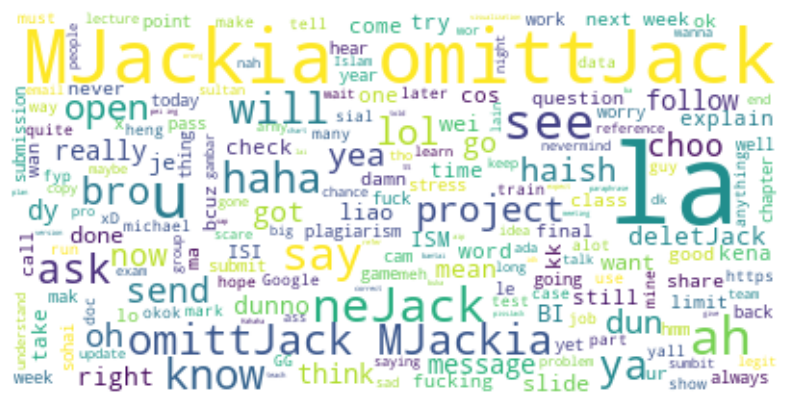

In [52]:
### ------ Word Cloud of mostly used word in our Group
text = " ".join(review for review in df.Message)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

### ------ Display the generated image:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Step 9: Calculating the total number of messages sent by each user

In [53]:
###------ Creates a list of unique Authors
l = df.Author.unique()

for i in range(len(l)):
  ###------ Filtering out messages of particular user
  req_df = df[df["Author"] == l[i]]

  ###------ req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])

Ali   ->   541
Jack   ->   491


# Step 10: Analyzing the distribution of messages sent on different days of the week

In [54]:
l = df.Day.unique()
for i in range(len(l)):
  ### ------ Filtering out messages of particular user
  req_df = df[df["Day"] == l[i]]

  ###------- req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])

Friday   ->   239
Saturday   ->   182
Sunday   ->   243
Tuesday   ->   16
Wednesday   ->   227
Thursday   ->   125


# Step 11: Identifying the most active author in the chat

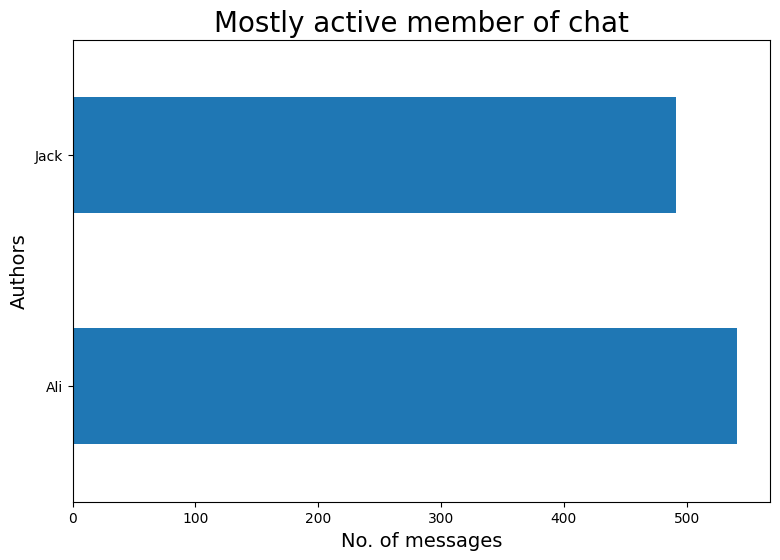

In [55]:
### ------ Most Active Author in the chat
plt.figure(figsize=(9,6))
author_value_counts = df['Author'].value_counts() #--- Number of messages per author
most_active = author_value_counts.head(10) #--- Number of messages per author for the  most active author
most_active.plot.barh() #--- Plot a bar chart using pandas built-in plotting apis

plt.xlabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('Authors',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Mostly active member of chat',fontdict={'fontsize': 20,'fontweight': 8})
plt.show()


# Step 12: Determining the most active day of the week

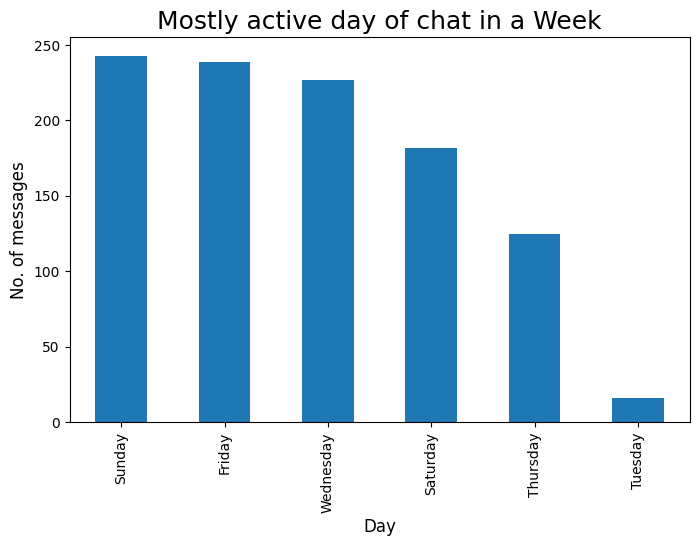

In [56]:
### ------ Mostly Active day in the chat
plt.figure(figsize=(8,5))
active_day = df['Day'].value_counts()

### ------ Most active author in the chat is : 
a_d = active_day.head(10)
a_d.plot.bar()
plt.xlabel('Day',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Mostly active day of chat in a Week',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

# ***In the subsequent steps, time series analysis is conducted on the chat data:***

# Step 13: Identifying periods of high chat activity

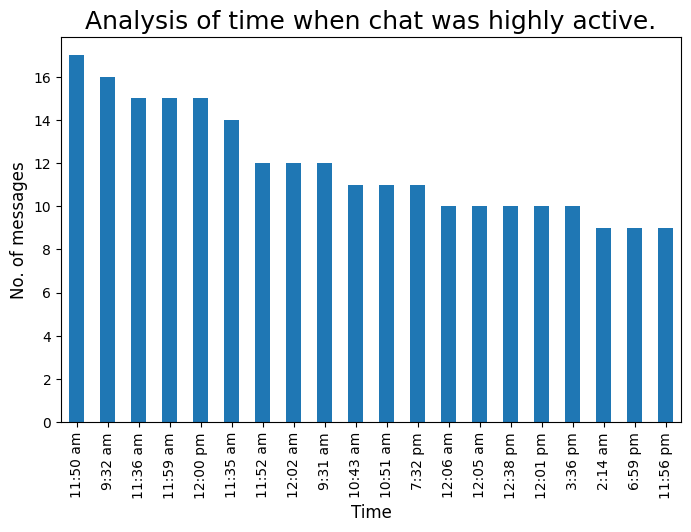

In [57]:
###------  Time whenever the chat is highly active
plt.figure(figsize=(8,5))
t = df['Time'].value_counts().head(20)
tx = t.plot.bar()
tx.yaxis.set_major_locator(MaxNLocator(integer=True))  #----- Converting y axis data to integer
plt.xlabel('Time',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Analysis of time when chat was highly active.',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

# Step 14: Determining the specific dates when the chat was highly active

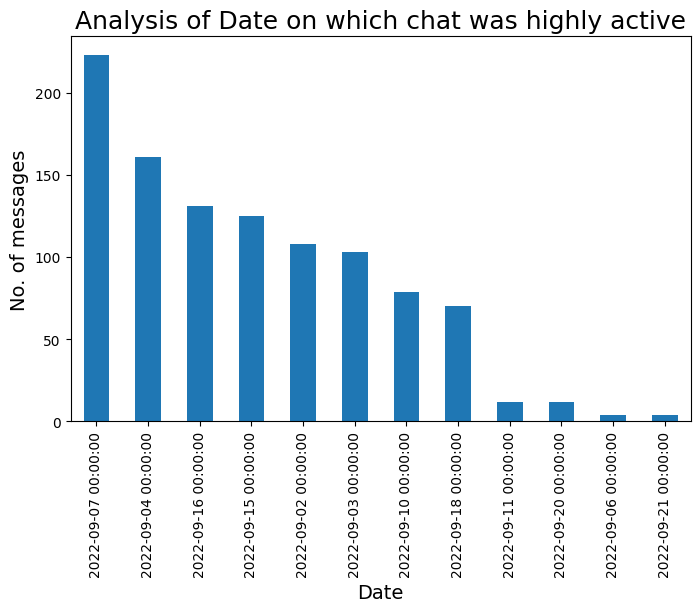

In [58]:
###---- Date on which the chat highly active.
plt.figure(figsize=(8,5))
df['Date'].value_counts().head(15).plot.bar()
plt.xlabel('Date',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Analysis of Date on which chat was highly active',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

# Step 15: Converting the time format from 12-hour to 24-hour for better analysis

In [59]:
lst = []
for i in df['Time']:
  out_time = datetime.strftime(datetime.strptime(i,"%I:%M %p"),"%H:%M")
  lst.append(out_time)
df['24H_Time'] = lst
df['Hours'] = df['24H_Time'].apply(lambda x : x.split(':')[0])

# Step 16: Determining the most favorable hour of the day for receiving a response from the user.

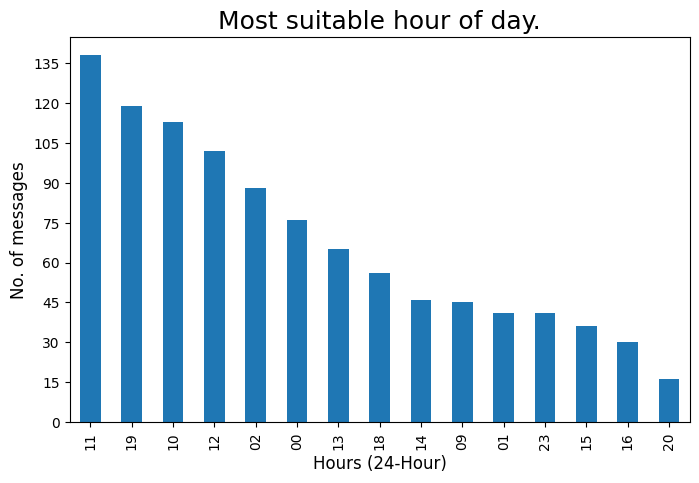

In [60]:
###------ Most suitable hour of day, whenever there will more chances of getting responce from group members.
plt.figure(figsize=(8,5))
std_time = df['Hours'].value_counts().head(15)
s_T = std_time.plot.bar()
s_T.yaxis.set_major_locator(MaxNLocator(integer=True))  #Converting y axis data to integer
plt.xlabel('Hours (24-Hour)',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Most suitable hour of day.',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()